In [ ]:
import pandas as kunfu
import pandas as pd
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

In [ ]:
train = pd.read_csv("TRX-INR.csv")
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-18,1.204135,1.320680,1.193566,1.282553,1.282553,5.692772e+10
1,2019-09-19,1.281923,1.285673,1.188290,1.260154,1.260154,5.260453e+10
2,2019-09-20,1.259541,1.260345,1.217807,1.238463,1.238463,4.390816e+10
3,2019-09-21,1.238608,1.317994,1.226233,1.297868,1.297868,4.641161e+10
4,2019-09-22,1.297886,1.297789,1.182055,1.204758,1.204758,4.648997e+10
...,...,...,...,...,...,...,...
598,2021-05-08,10.816779,11.197195,10.372360,10.489435,10.489435,2.565695e+11
599,2021-05-09,10.483030,10.677703,9.917608,10.471397,10.471397,2.527436e+11
600,2021-05-10,10.474964,10.867714,8.966151,9.346238,9.346238,2.986974e+11
601,2021-05-11,9.344668,10.219067,8.934051,10.186395,10.186395,3.007879e+11


<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2019-09-18  1.282553
2019-09-19  1.260154
2019-09-20  1.238463
2019-09-21  1.297868
2019-09-22  1.204758


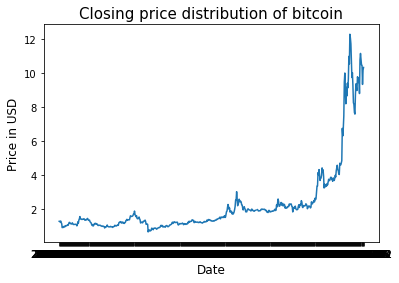

In [ ]:
data = train['Close']
Date1 = train['Date']
train1 = train[['Date','Close']]
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

In [ ]:
train2 = train2[train2.Close.isnull() == False]

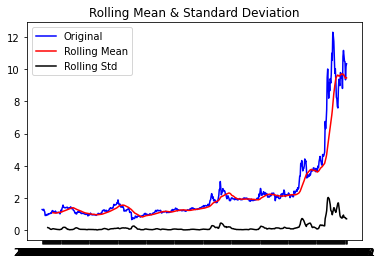

ADF Stastistic: 1.938849
p-value: 0.998588
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['Close']      
test_stationarity(ts)

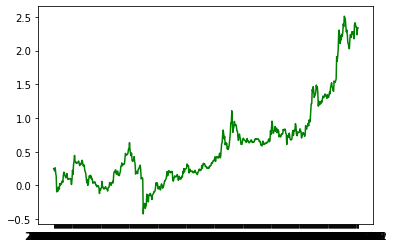

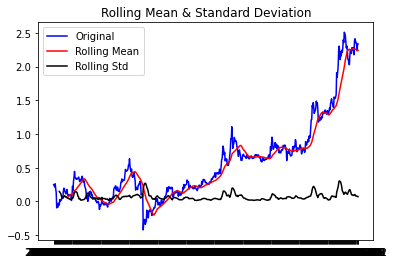

ADF Stastistic: 0.523027
p-value: 0.985556
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [ ]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

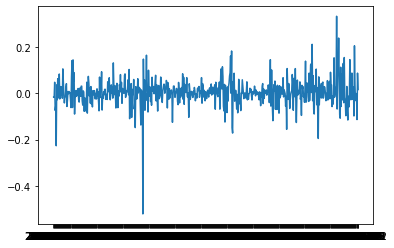

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

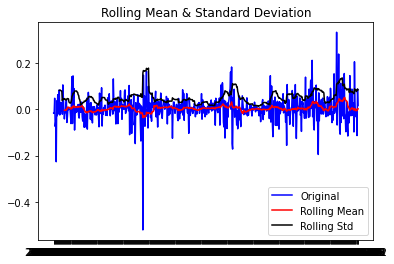

ADF Stastistic: -5.512837
p-value: 0.000002
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.569 


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


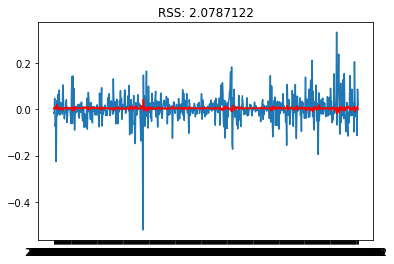

In [ ]:
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


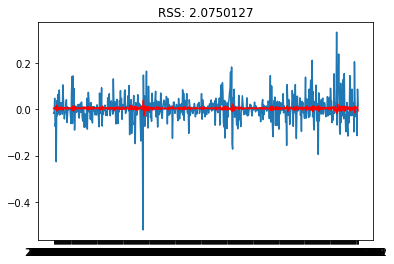

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

Printing Predicted vs Expected Values...


predicted = 2.400858,   expected = 2.417472,   error = 0.687238  %
predicted = 2.421063,   expected = 2.509141,   error = 3.510278  %
predicted = 2.504351,   expected = 2.421221,   error = 3.433399  %
predicted = 2.433644,   expected = 2.638991,   error = 7.781281  %
predicted = 2.620401,   expected = 2.555326,   error = 2.546657  %
predicted = 2.570201,   expected = 2.618576,   error = 1.847383  %
predicted = 2.615139,   expected = 2.957007,   error = 11.561298  %
predicted = 2.929385,   expected = 3.353866,   error = 12.656460  %
predicted = 3.332151,   expected = 3.362920,   error = 0.914948  %
predicted = 3.376106,   expected = 4.149110,   error = 18.630601  %
predicted = 4.089716,   expected = 4.015872,   error = 1.838794  %
predicted = 4.065187,   expected = 4.327595,   error = 6.063600  %
predicted = 4.305289,   expected = 4.032216,   error = 6.772273  %
predicted = 4.079848,   expected = 3.686140,   error = 10.680766  %
predicted = 3.7

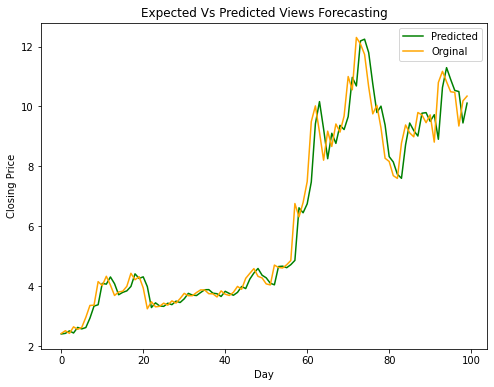

In [ ]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()


In [ ]:
import numpy as np
p = np.array(train2)

for t in range(30):
    model = ARIMA(p, order=(3, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    p = np.append(p, pred_value)
    print(pred_value)

[10.396774]
[10.41329572]
[10.42935309]
[10.44443566]
[10.4596854]
[10.47489079]
[10.49010904]
[10.50532427]
[10.52054033]
[10.53575618]
[10.55097209]
[10.56618798]
[10.58140387]
[10.59661977]
[10.61183566]
[10.62705156]
[10.64226745]
[10.65748335]
[10.67269924]
[10.68791514]
[10.70313103]
[10.71834693]
[10.73356282]
[10.74877872]
[10.76399462]
[10.77921051]
[10.79442641]
[10.8096423]
[10.8248582]
[10.84007409]
[10.85528999]
[10.87050588]
[10.88572178]
[10.90093767]
[10.91615357]
[10.93136946]
[10.94658535]
[10.96180125]
[10.97701714]
[10.99223304]
[11.00744893]
[11.02266483]
[11.03788072]
[11.05309661]
[11.06831251]
[11.0835284]
[11.0987443]
[11.11396019]
[11.12917609]
[11.14439198]
[11.15960788]
[11.17482377]
[11.19003967]
[11.20525556]
[11.22047145]
[11.23568735]
[11.25090324]
[11.26611914]
[11.28133503]
[11.29655092]
[11.31176682]
[11.32698271]
[11.34219861]
[11.3574145]
[11.3726304]
[11.38784629]
[11.40306219]
[11.41827808]
[11.43349397]
[11.44870986]
[11.46392576]
[11.47914165]
[

In [ ]:
p.shape

(899,)

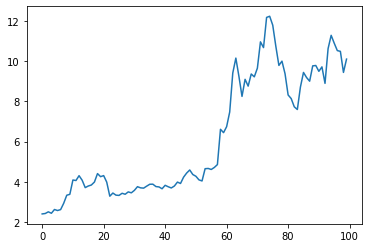

In [ ]:
from matplotlib import pyplot as plt
x = np.arange(0,len(predictions),1)
plt.plot(x,predictions)